# Encoder

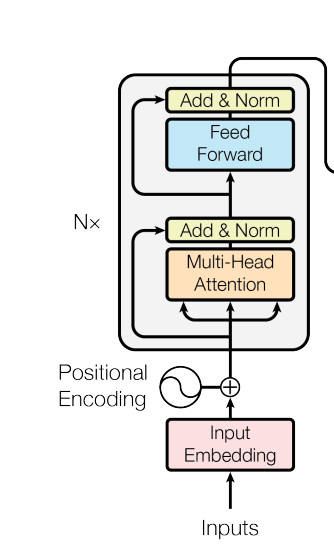

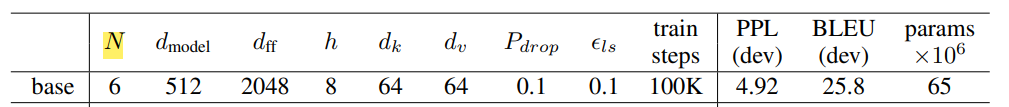

encoder Class화 하는 과정, 논문에서는 encoder를 6번 반복한다.

In [ ]:
class encoderlayer(nn.Module):
  def __init__(self):
    super().__init__()

    hidden_size = 512

    self.multihead_attn = Mutihead_attention()
    self.layer_norm1 = nn.LayerNorm(hidden_size)
    self.pos_ffn = PoswiseFeedForwardNet()
    self.layer_norm2 =  nn.LayerNorm(hidden_size)

  def forward(self, inputs, attention_mask):
    attn_output, attn_prob = self.multihead_attn(inputs, inputs, inputs, attention_mask)
    attn_output = self.layer_norm1(inputs + attn_output)
    ffn_output = self.pos_ffn(attn_output)
    ffn_output = self.layer_norm2(ffn_output + attn_output)\

    return ffn_output, attn_prob

In [ ]:
class encoder(nn.Module):
  def __init__(self):
    super().__init__()
    # 문장을 Token화 과정
    n_vocab = tokenizer.vocab_size
    hidden_size = 512
    # 문장의 Encoding 과정
    self.enc_pos = nn.Embedding(n_vocab, hidden_size)

    n_seq = 64
    # Position Encoding을 만들어 주는 과정
    self.pos_enc = torch.FloatTensor(positional_encoding(n_seq))
    self.pos_emb = nn.Embedding.from_pretrained(self.pos_enc, freeze=True)

    n_layer = 6
    self.layers = nn.ModuleList([encoderlayer() for _ in range(n_layer)])

  def forward(self, inputs):
    position = torch.arange(inputs.size(1)).expand(inputs.size(0), inputs.size(1)).contiguous()
    pos_mask = inputs.eq(0)
    #pad Token에 해당하는 부분을 0으로 만드는 과정
    position = position.masked_fill_(pos_mask, 0)
    
    pos_angle = self.pos_emb(position)
    #input을 embedding하고 Position Encoding을 더해주는 과정
    output = self.enc_pos(inputs) + pos_angle
    
    attention_mask = inputs.eq(0).unsqueeze(1).expand(inputs.size(0), inputs.size(1), inputs.size(1))
    attn_probs = []

    for layer in self.layers:
      output, attn_prob = layer(output, attention_mask)
      attn_probs.append(attn_prob)

    return output, attn_prob

### Encoder with nn.TransformerEncoderLayer

In [ ]:
# Encoder Part
class encoder(nn.Module):
    def __init__(self):
        super().__init__()
        encoder_layer = nn.TransformerEncoderLayer(d_model: int = 512, nheadL int = 8, dropout: float = 0.1, 
                                                        dim_feedforward: int = (512 * 4), batch_first: bool = True)
        self.enc_layers = nn.ModuleList([encoder_layer for _ in range(args.n_layer)])
    
    def forward(self, enc_inputs, enc_padding_mask):
        for e_layer in self.enc_layers:
            enc_inputs = e_layer(enc_inputs, src_key_padding_mask  = enc_padding_mask)
        return enc_inputs